                Country      Continent          Last_Update        Lat       Long_  Confirmed  Deaths  Recovered  Active  Incident_Rate
0             Australia      Australia  2020-08-10 06:34:52 -25.000000  133.000000    21397.0   313.0    12141.0  8943.0      84.042624
1               Austria         Europe  2020-08-10 06:34:52  47.516200   14.550100    22033.0   721.0    19923.0  1389.0     244.637147
2                Canada  North America  2020-08-10 06:34:52  60.001000  -95.001000   121367.0  9028.0   105420.0  6919.0     320.604278
3                 China           Asia  2020-08-10 06:34:52  30.592800  114.305500    88793.0  4686.0    82125.0  1982.0       6.321243
4               Denmark         Europe  2020-08-10 06:34:52  56.263900    9.501800    14759.0   617.0    13069.0  1073.0     254.808058
..                  ...            ...                  ...        ...         ...        ...     ...        ...     ...            ...
183  West Bank and Gaza         Others  2020-08-

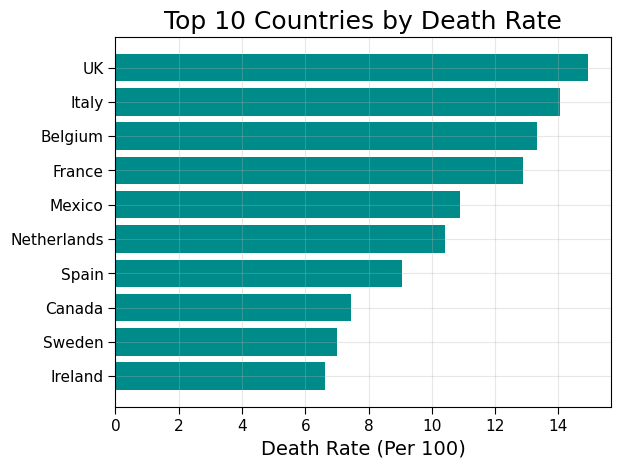

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# 디스플레이 옵션 설정
pd.set_option('display.width', 320)
pd.set_option('display.max_columns', 20)


# csv 파일 읽어와서 dataframe으로 저장
df_covid = pd.read_csv('./data/cases_country.csv')
print(df_covid)

# 나라, 확진자, 사망자 데이터만 추출
df_countries_cases = df_covid[['Country', 'Confirmed', 'Deaths']]
df_countries_cases.index = df_countries_cases["Country"]
df_countries_cases = df_countries_cases.drop(['Country'], axis=1)
print(df_countries_cases)


# 나라별 사망률 구하기
df_countries_cases['Death Rate (Per 100)'] = 100 * df_countries_cases['Deaths'] / df_countries_cases['Confirmed']
print(df_countries_cases)


# 사망률 가장 높은 10개 나라 (사망자 1000명 이상)
df_top10_countries_dr = df_countries_cases[df_countries_cases['Deaths'] >= 1000].sort_values('Death Rate (Per 100)')[-10:]
print(df_top10_countries_dr)


# 사망률 바 그래프
plt.barh(df_top10_countries_dr.index, df_top10_countries_dr['Death Rate (Per 100)'], color="darkcyan")
plt.tick_params(size=5, labelsize=11)
plt.xlabel("Death Rate (Per 100)", fontsize=14)
plt.title("Top 10 Countries by Death Rate", fontsize=18)
plt.grid(alpha=0.3)
plt.show()